# This file is to demonstrate the hidden networks with 15*N=28 and then get the verified results
------ Huifang Wang, INSERM U1106


In [1]:
import scipy.io
import os.path
import sys

sys.path.append( os.path.expanduser('./Demonstration/') )
sys.path.append( os.path.expanduser('./BasicTools/') )

import mln_tools as mt
import mln_plt_demonstration as md
import mne
import mln_circle as mc
sys.path.append( os.path.expanduser('./Inference/') )
import mln_cal_mat_mltp as mi

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.gridspec as gridspec

In [4]:
def mln_read_mlnMat(filename):
    matdata = scipy.io.loadmat(filename)
    mlnMat=matdata['mlnMat']
    para=matdata['para'][0][0]
    
    return mlnMat, para

In [5]:
def mln_fmlnMat(nc, filename):
    mlnMat,para=mln_read_mlnMat(filename)
    methodlog=para['methodlog']
    theta=para['theta']


    #fmlnMat=np.zeros([nc,nc])    
    thetamlnMat=mlnMat
    for iboot in np.arange(20):
        imlnMat=mlnMat[:,:,iboot]
        ithethod=para['theta'][iboot]
        imlnMat[imlnMat<ithethod[0]]=0
        imlnMat[imlnMat>=ithethod[1]]=2
        imlnMat[(imlnMat>=ithethod[0])*(imlnMat<ithethod[1])]=1
        thetamlnMat[:,:,iboot]=imlnMat
    imdMat=np.median(thetamlnMat,axis=2)
    imdMat[imdMat<0.6]=0.
    return imdMat

In [6]:
from mne.viz import circular_layout

In [7]:
import itertools

In [8]:
def mln_plt_Mat_simlated(gtMat,nc,labelname,fig,subplot,title,mcolormap='cool',cg=0):
    #labelname=['N'+str(inode) for inode in np.arange(1,nc+1)]
    from mne.viz import circular_layout
    node_angles = circular_layout(labelname, labelname, start_pos=90,
                                  group_boundaries=np.arange(0,nc,nc/2).tolist())
    Ngsub=ceil(nc/2)
    Color_ch=[plt.cm.spectral_r(i/5/Ngsub) for i in np.arange(nc)]
    #showbestthetaAUC=[ 0.31234161,  0.34730178,  0.41787416,  0.47861825,  0.56268994,
     #       0.68119631,  0.80791791,  0.86288356,  0.89986384,  0.92352849]

    #thetav=[showbestthetaAUC[8],showbestthetaAUC[9]+0.015]

    #fig, axes=mplotc.plot_connectivity_circle_dir_signal(gtMat, labelname, n_lines=None,facecolor='white',textcolor='black',
     #                        node_colors=Color_ch,colormap= 'cool',node_angles=node_angles, flagcon = 'F',  
      #                      title=title,fig=fig,subplot=subplot,padding = 4.,color_given=cg) 
    
    fig, axes=mc.plot_connectivity_circle_dir_signal(gtMat, labelname, threshold=0.1,n_lines=None,facecolor='white',textcolor='black',
                             node_colors=Color_ch,colormap=mcolormap,node_angles=node_angles, fontsize_names=16,flagcon = 'F',  
                            title=title,fig=fig,subplot=subplot,padding = 4.,color_given=cg,fontsize_colorbar=12) 
    

In [9]:
channellist=[np.arange(0,20).astype(int),np.arange(10,30).astype(int),np.concatenate((np.arange(0,10).astype(int),np.arange(20,30).astype(int)),axis=0)]

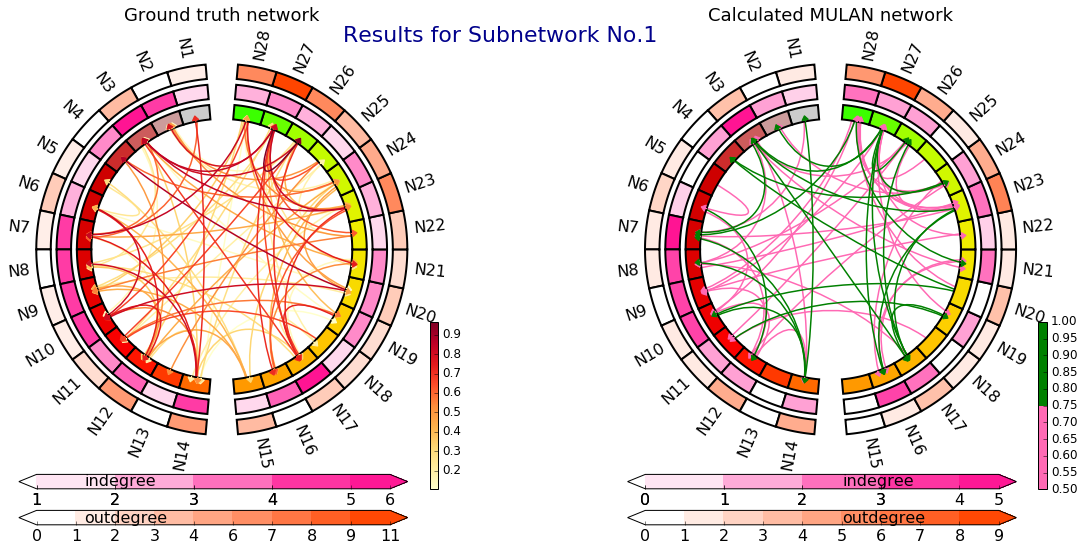

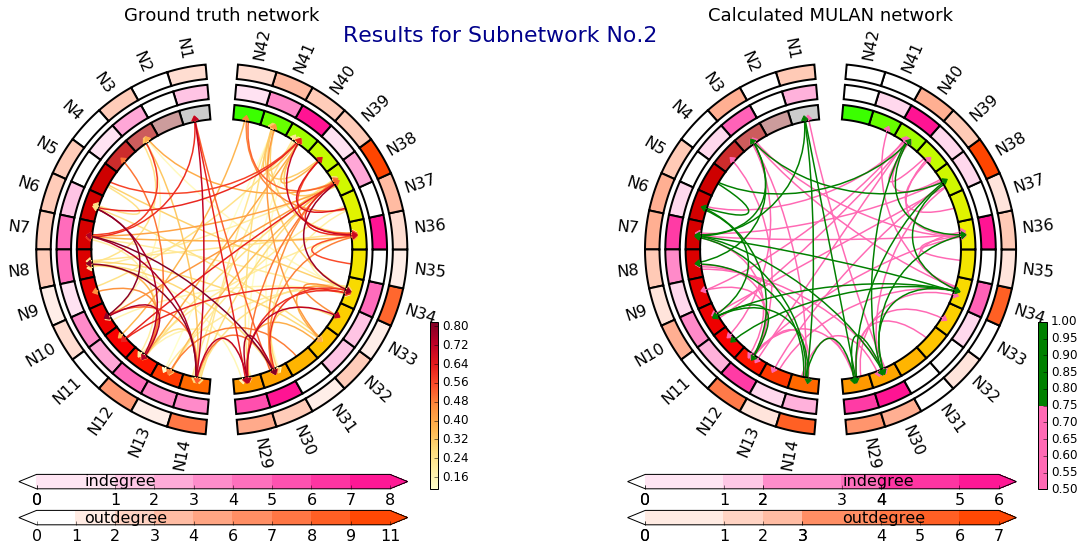

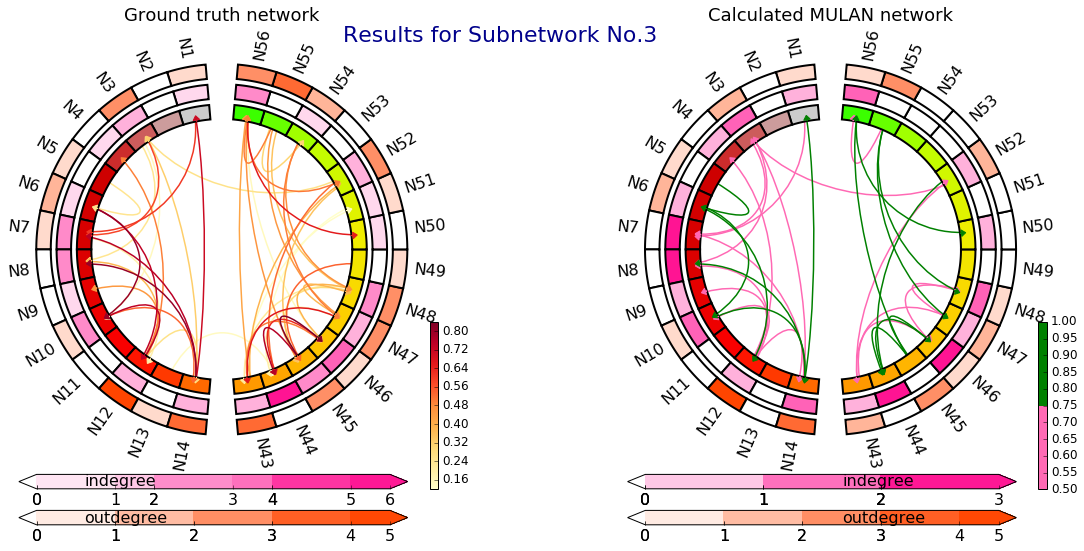

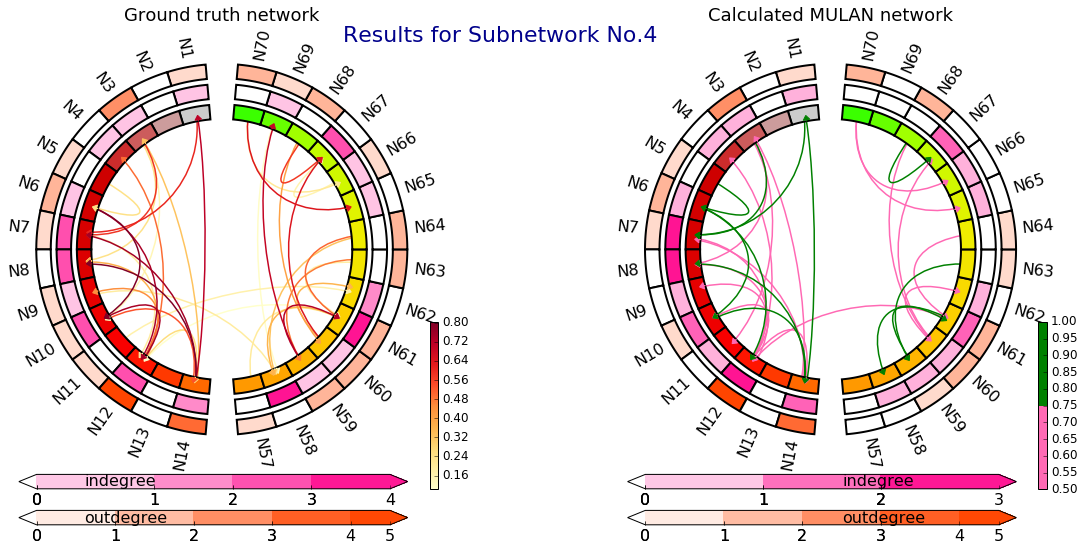

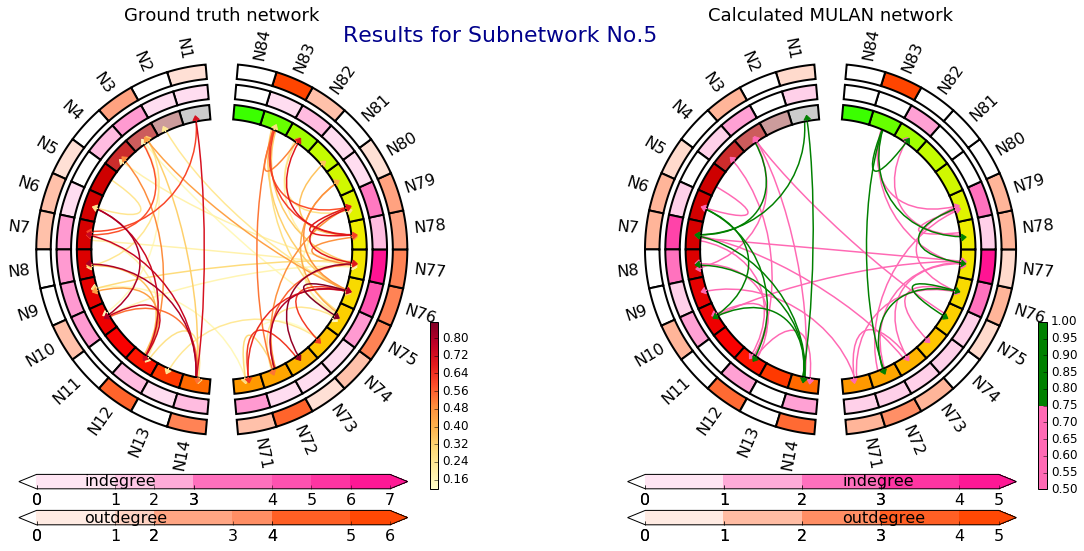

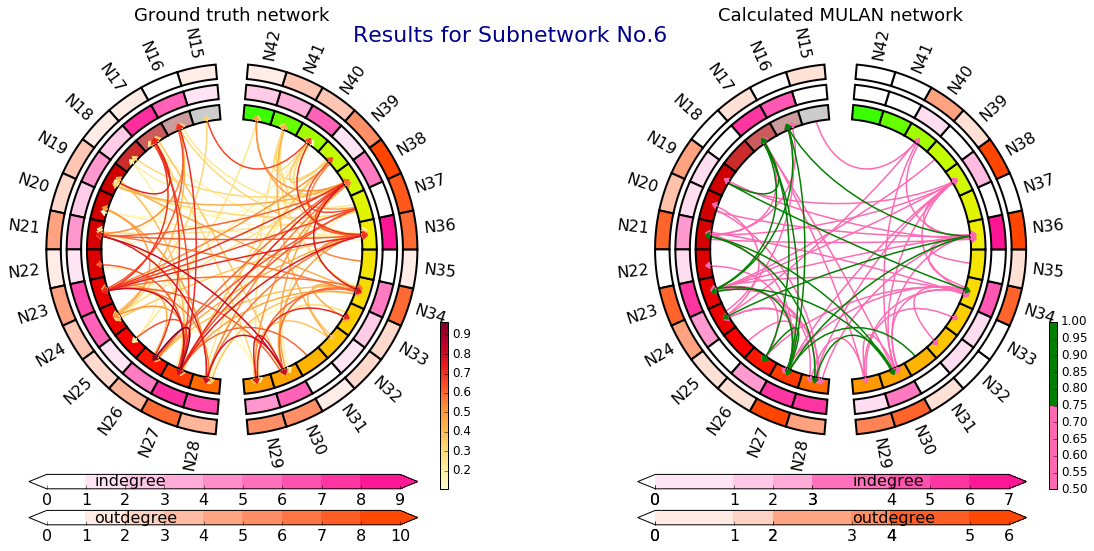

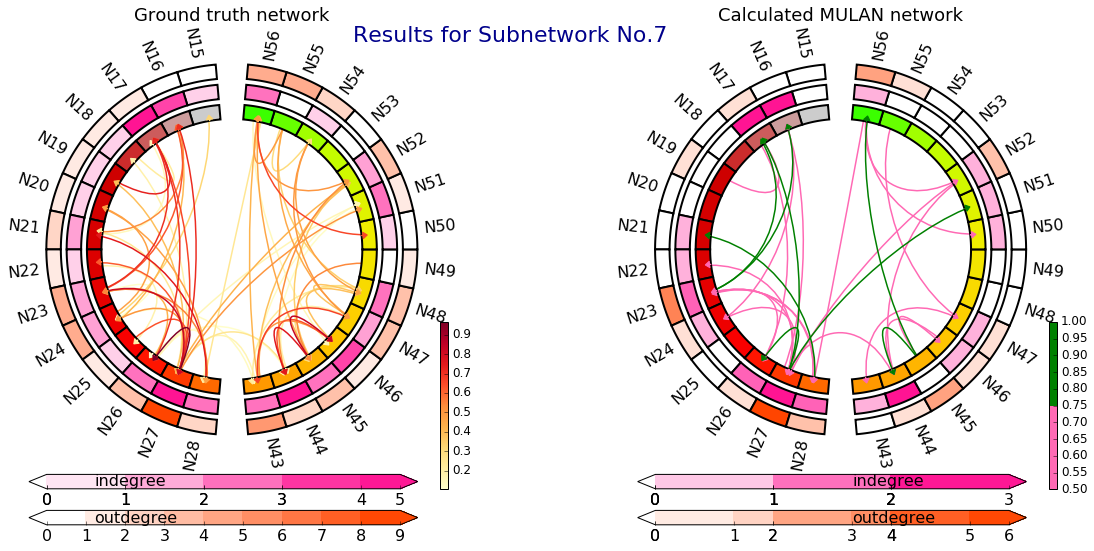

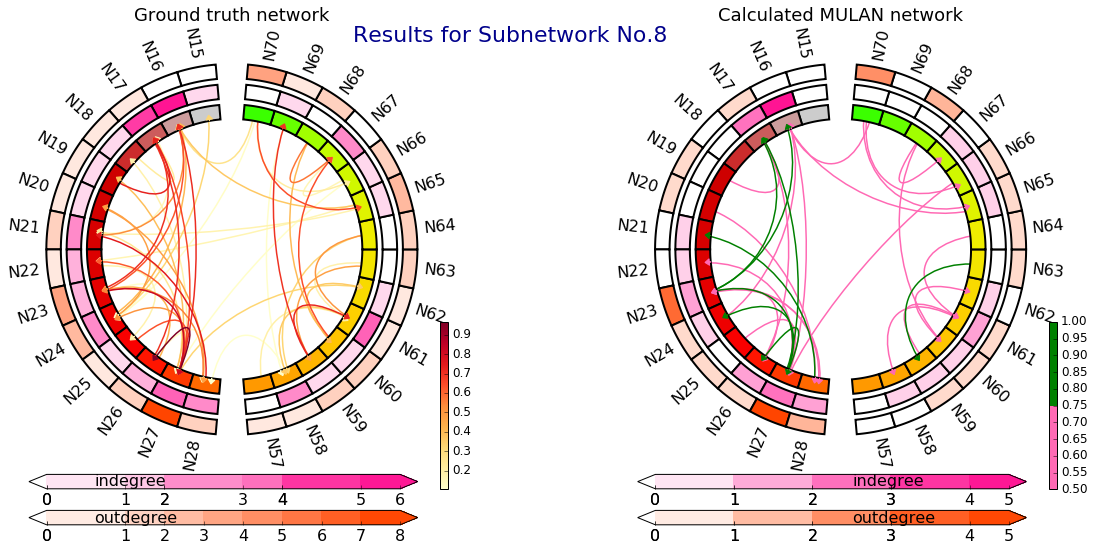

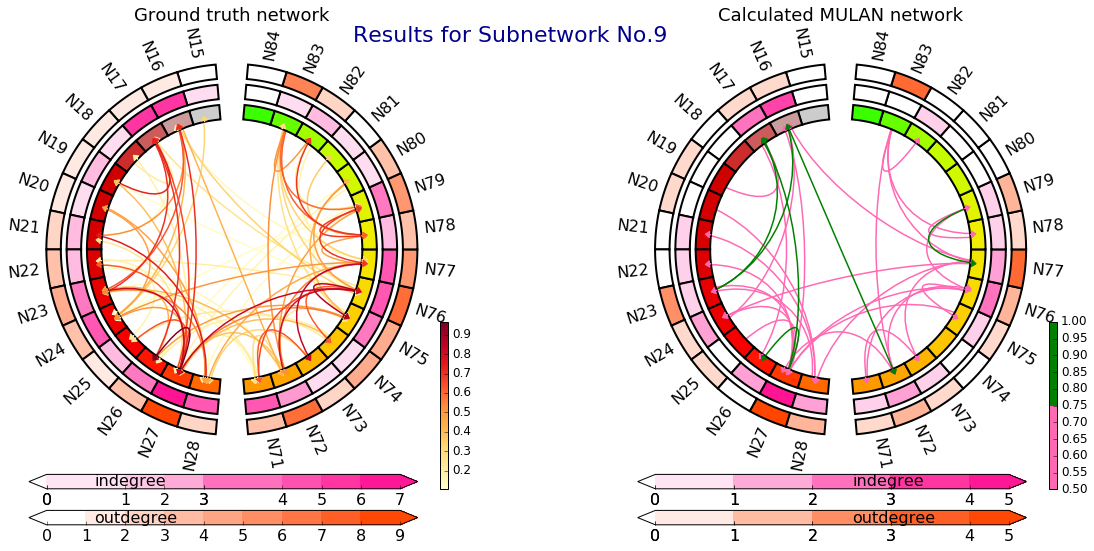

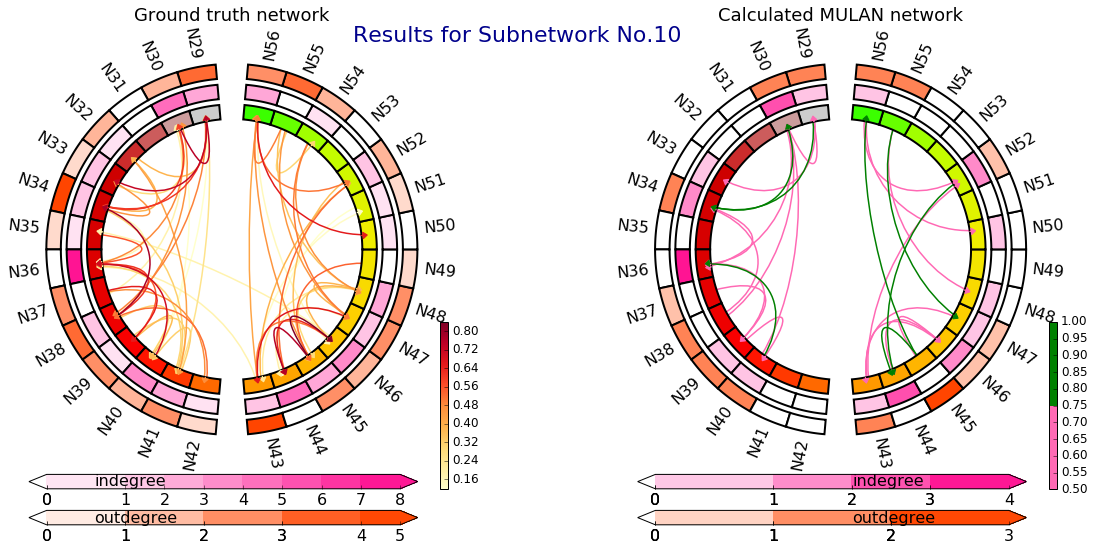

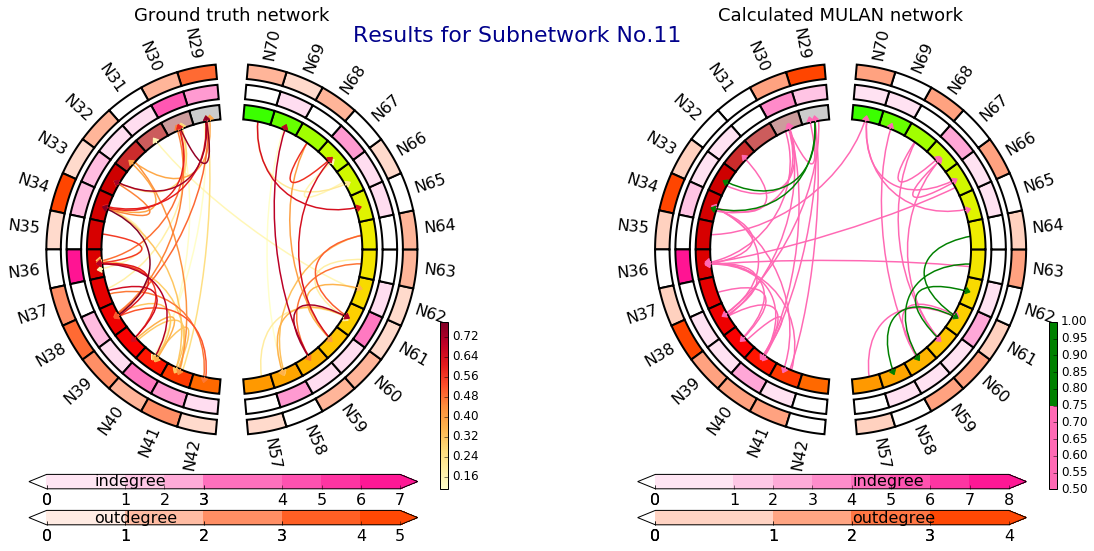

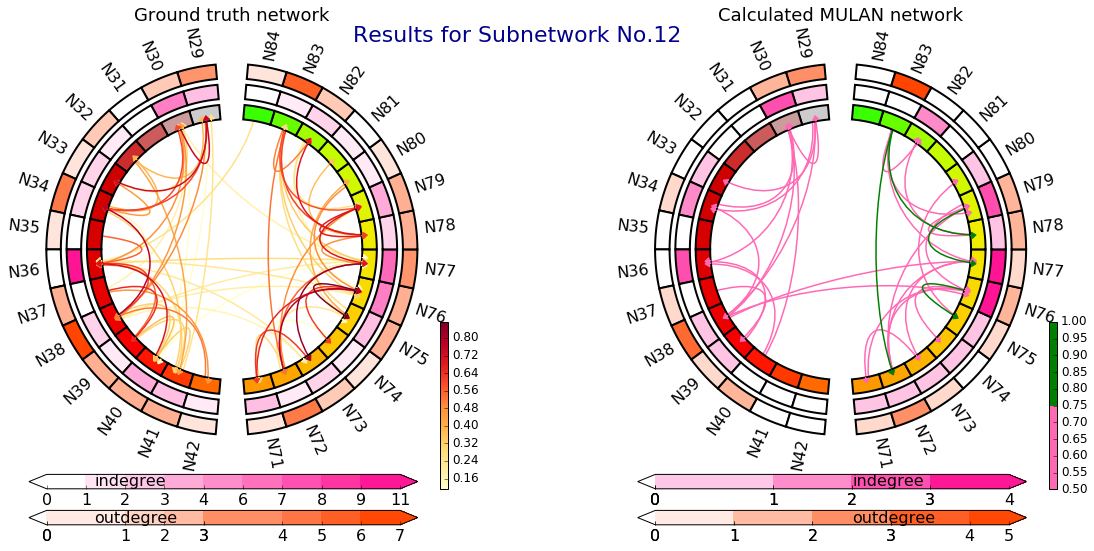

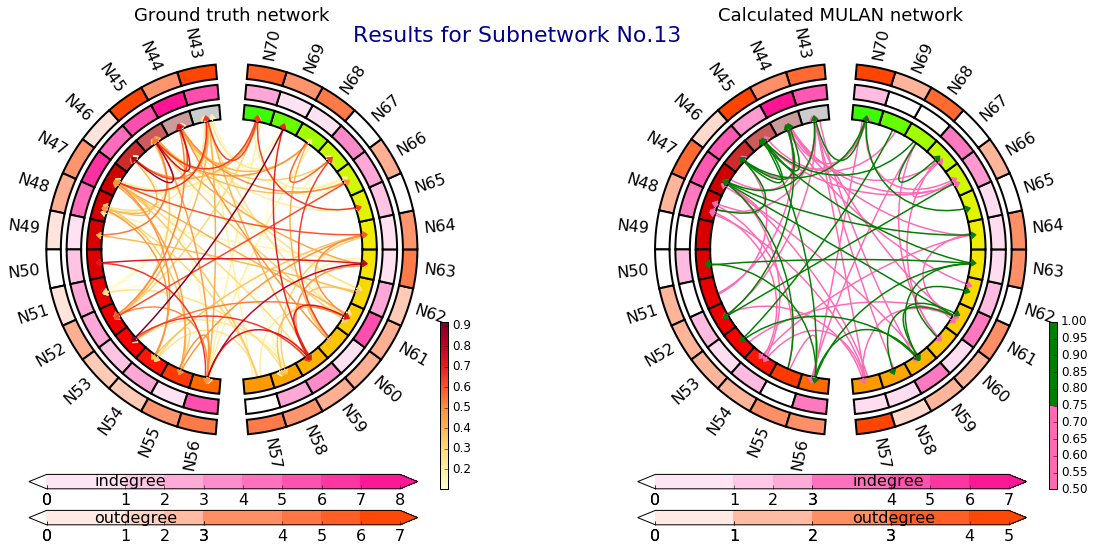

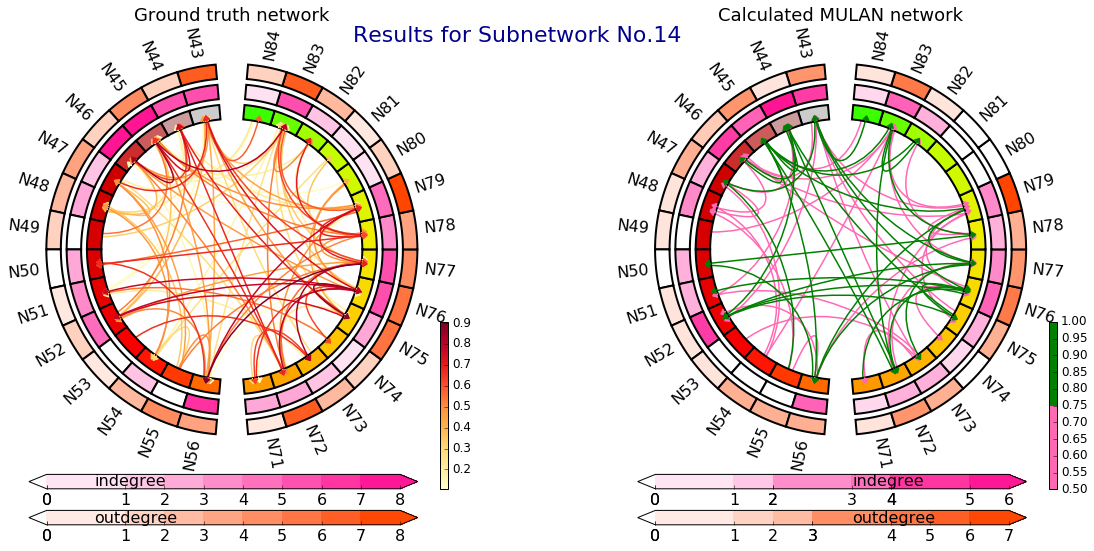

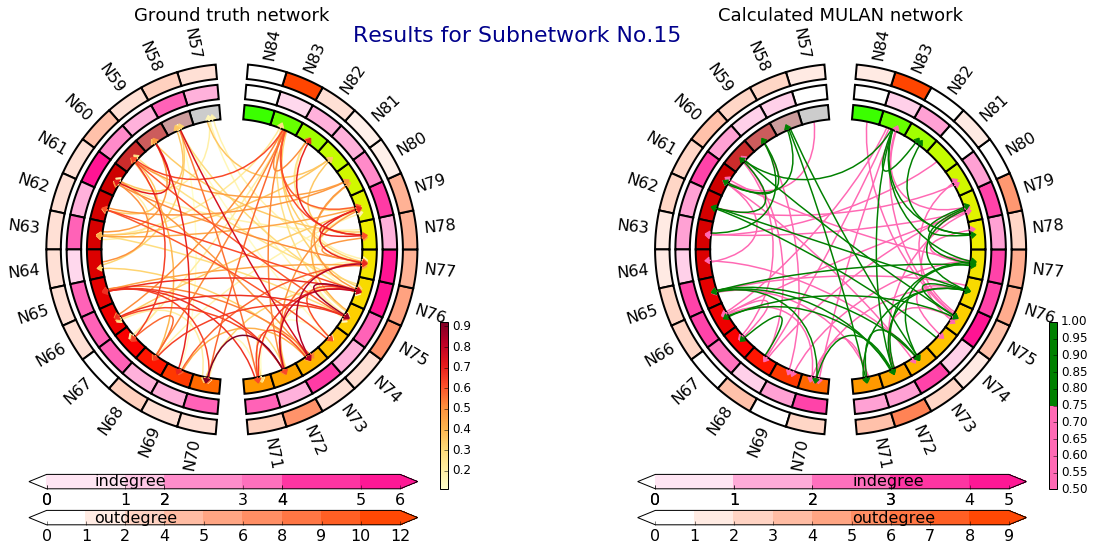

In [10]:
basicrawdir='./Examples/HC84Nodes/'
basicdir=basicrawdir+'hidden/'

iwins=1500
itype='tak'
iG=5
Toutdir=basicdir+'/'+'/ToutResults/'
datasets='simN84N5100Ex1'

savedir = basicdir +'/plt/'
nc=28
   
for inbgv,bgv in enumerate(itertools.combinations(np.arange(6)+1,2)):
    addname='b'+str(bgv[0])+str(bgv[1])
    prename=datasets+addname

    

    toutfile='Adp_'+str(iwins)+'_'+prename+'FRN_G'+str(iG)+'_'+itype+'.mat'
    filename=Toutdir+toutfile
    matdata = scipy.io.loadmat(filename)

    fromdata = scipy.io.loadmat(basicdir+'/'+'/data/'+prename+'.mat')

    gtMat=fromdata['Connectivity']

    para=matdata['para']
    mlnMat=matdata['mlnMat']
    Params=fromdata['Params']
    
    iliststr=Params['str'][:][0][0][0]
    labelname=['N'+str(il[0][0]) for il in iliststr] 
    node_angles = circular_layout(labelname, labelname, start_pos=90,
                                  group_boundaries=[0, len(labelname) / 2])

    iBMed='mlnMat'
    BMwins=matdata[iBMed]

    fmlnMat=mln_fmlnMat(nc,filename)

    fig= plt.figure(figsize = (20,10))

    mln_plt_Mat_simlated(gtMat,nc,labelname,fig,subplot=121,title='Ground truth network',mcolormap='YlOrRd')

    mln_plt_Mat_simlated(fmlnMat/2,nc,labelname,fig,subplot=122,title='Calculated MULAN network', mcolormap='mulan',cg=0)
    fig.text(0.35,0.8,'Results for Subnetwork No.'+str(inbgv+1), fontsize = 22, color ='DarkBlue' )
#fig.savefig(basicdir+'ground_Net_N_L+SG1''.eps',dpi=300)


In [11]:
def mln_read_listlink(dfilename):
    
    timedata = scipy.io.loadmat(dfilename)
    Params=timedata['Params']
    para=matdata['para'][0][0]
    iliststr=Params['str'][:][0][0][0]
    #ilistlink=[(iliststr[inode][0][0],iliststr[jnode][0][0]) for inode in np.arange(nc) for jnode in np.arange(nc)]
    return iliststr

##### Calculate the matrix with N=84 by combining the results from subnetwork and save it 


In [12]:

Toutdir=basicdir+'/'+'/ToutResults/'
savedatadir = basicdir +'/Con/'
savefilename=savedatadir+'mlnR'+datasets+'.mat'
if not os.path.exists(savedatadir):
    os.makedirs(savedatadir)        
if not os.path.isfile(savefilename):
    itype='tak'
    iG=5
    nchan=84
    nc=28

    prename=datasets+addname

    hidata = scipy.io.loadmat(basicrawdir+'/'+'/data/'+datasets+'.mat')
    N84gtMat=hidata['Connectivity']


    # from three N=20 networks we build the one 
    N28fMat=[]

    listlinkall=[]

    for inbgv,bgv in enumerate(itertools.combinations(np.arange(6)+1,2)):
        addname='b'+str(bgv[0])+str(bgv[1])

        id_datasets=datasets+addname
        filename=basicdir+'/ToutResults/'+'Adp_'+str(iwins)+'_'+id_datasets+'FRN_G'+str(iG)+'_'+itype
        ifMat=mln_fmlnMat(nc,filename)
        #ib_labelname=[labelname[indch] for indch in ilistCa]
        dfilename=basicdir+'/data/'+id_datasets
        iliststr = mln_read_listlink(dfilename)
        ifMatO=np.zeros([nchan,nchan])
        for iind, inode in enumerate(iliststr):
            for jind,jnode in enumerate(iliststr):
                 ifMatO[inode-1,jnode-1]=ifMat[iind,jind]
                 listlinkall.append((iliststr[iind][0][0],iliststr[jind][0][0]))
        N28fMat.append(ifMatO)
    fNchanMat=np.zeros([nchan,nchan])
    for inode in np.arange(nchan):
        for jnode in np.arange(nchan):
            Nlink=listlinkall.count((inode+1,jnode+1))

            ijfMatSum=[N28fMat[isub][inode][jnode] for isub in np.arange(15)]
            fNchanMat[inode,jnode]=np.sum(ijfMatSum)/Nlink
    scipy.io.savemat(savefilename,{'fNchanMat':fNchanMat,'N28fMat':N28fMat,'gtMat':N84gtMat})



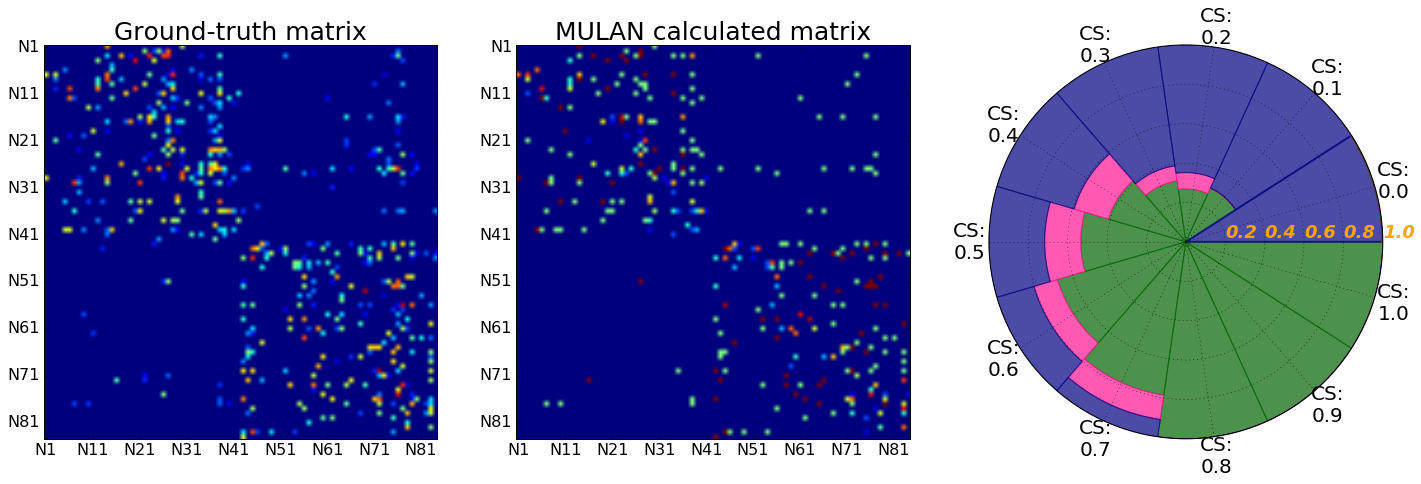

In [13]:
Toutdir=basicdir+'/'+'/ToutResults/'
savedatadir = basicdir +'/Con/'

itype='tak'
iG=5
nchan=84
nc=28
labelnameN84=['N'+str(ichan+1) for ichan in np.arange(nchan)]

mlnfMat = scipy.io.loadmat(savedatadir+'mlnR'+datasets+'.mat')
fNchanMat=mlnfMat['fNchanMat']

gtMat=mlnfMat['gtMat']
figure(figsize=(24,8))
xindex=np.arange(0,nchan,10)
labelxN84=[labelnameN84[ix] for ix in xindex]

ax1=subplot(131)
hidata = scipy.io.loadmat(basicrawdir+'/'+'/data/'+datasets+'.mat')
N84gtMat=hidata['Connectivity']
plt.imshow(N84gtMat)
ax1.set_xticks(xindex)
ax1.set_xticklabels(labelxN84,size=16)
ax1.set_yticks(xindex)
ax1.set_yticklabels(labelxN84,size=16)
ax1.set_title('Ground-truth matrix',size=25)

ax2=subplot(132)
plt.imshow(fNchanMat)

ax2.set_xticks(xindex)
ax2.set_xticklabels(labelxN84,size=16)
ax2.set_yticks(xindex)
ax2.set_yticklabels(labelxN84,size=16)
ax2.set_title('MULAN calculated matrix',size=25)
#cbar=plt.colorbar()
#cbar.ax.tick_params(labelsize=20)

ax3=subplot(133,polar=True)
tptnVectorR, tptnVector, pnVector=mi.mln_tptn(fNchanMat,N84gtMat,0.2,1)
md.mln_polar_bar_hf('try',tptnVectorR,ax=ax3)
savefig(savedatadir+datasets+'matric_pie.eps',dpi=300)



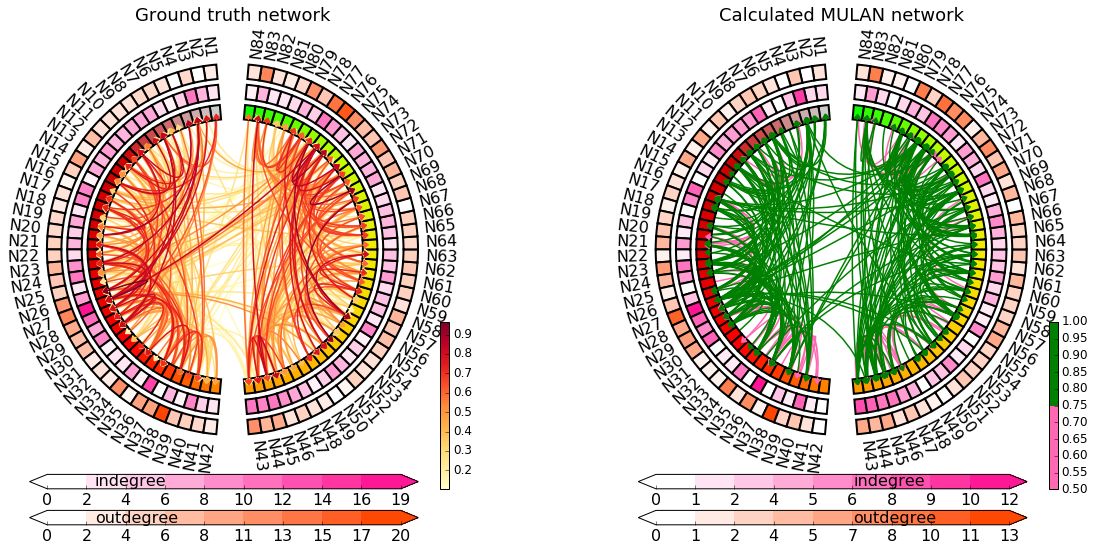

In [14]:
ithethod = [0.1,1]
imlnMat=fNchanMat.copy()
imlnMat[imlnMat<ithethod[0]]=0.
imlnMat[imlnMat>=ithethod[1]]=2.
imlnMat[(imlnMat>=ithethod[0])*(imlnMat<ithethod[1])]=1.
fMat=imlnMat-np.diag(imlnMat.diagonal())

fig= plt.figure(figsize = (20,10))
mln_plt_Mat_simlated(N84gtMat,nchan,labelnameN84,fig,subplot=121,title='Ground truth network',mcolormap='YlOrRd')
#mln_plt_Mat_simlated(fmlnMat[0,:,:],nc,fig,subplot=132,title='Calculated MULAN network',cg=1)

mln_plt_Mat_simlated(fMat/2,nchan,labelnameN84,fig,subplot=122,title='Calculated MULAN network', mcolormap='mulan',cg=0)
savefig(savedatadir+datasets+'mlnNetWork.eps',dpi=300)


In [15]:
def mln_con_hidden_in1_matrix(basicdir,datasets,savefilename,bm,N84gtMat):
    N28fMat=[]
    nchan=84
    listlinkall=[]
    for inbgv,bgv in enumerate(itertools.combinations(np.arange(6)+1,2)):
        addname='b'+str(bgv[0])+str(bgv[1])
        Toutdir=basicdir+'/'+'/ToutResults/'

        prename=datasets+addname



        toutfile='Tout_'+str(iwins)+'_'+prename+'.mat'
        id_datasets=datasets+addname
        filename=Toutdir+toutfile

        matdata = scipy.io.loadmat(filename)
        bmMat=matdata[bm]
        ifMat=np.mean(bmMat,axis=2)


        #ib_labelname=[labelname[indch] for indch in ilistCa]
        dfilename=basicdir+'/data/'+id_datasets
        
        iliststr = mln_read_listlink(dfilename)
        ifMatO=np.zeros([nchan,nchan])
        for iind, inode in enumerate(iliststr):
            for jind,jnode in enumerate(iliststr):
                 ifMatO[inode-1,jnode-1]=ifMat[iind,jind]
                 listlinkall.append((iliststr[iind][0][0],iliststr[jind][0][0]))
        N28fMat.append(ifMatO)
    fNchanMat=np.zeros([nchan,nchan])
    for inode in np.arange(nchan):
        for jnode in np.arange(nchan):
            Nlink=listlinkall.count((inode+1,jnode+1))

            ijfMatSum=[N28fMat[isub][inode][jnode] for isub in np.arange(15)]
            fNchanMat[inode,jnode]=np.sum(ijfMatSum)/Nlink
    
    scipy.io.savemat(savefilename,{'fNchanMat':fNchanMat,'N28fMat':N28fMat,'gtMat':N84gtMat})



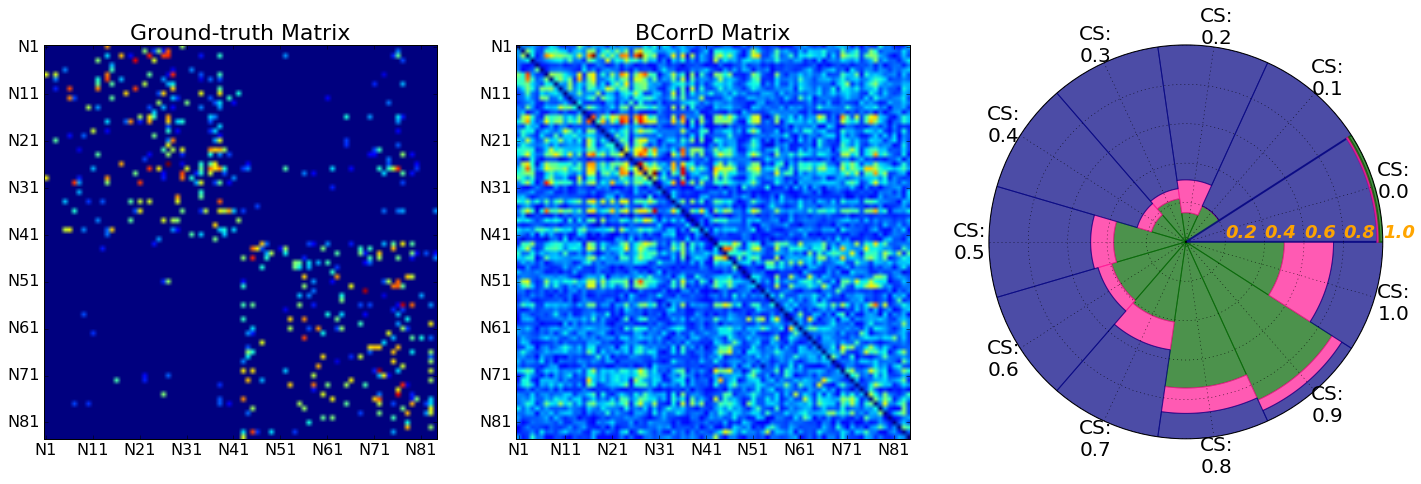

In [16]:
bm = 'BCorrD'
bmsavefilename=savedatadir+bm+datasets+'.mat'
if not os.path.isfile(bmsavefilename):
    mln_con_hidden_in1_matrix(basicdir,datasets,bmsavefilename,bm,N84gtMat)
BMmlnfMat = scipy.io.loadmat(bmsavefilename)
fNchanMat=BMmlnfMat['fNchanMat']
fig=figure(figsize=(24,8))
xindex=np.arange(0,nchan,10)
labelxN84=[labelnameN84[ix] for ix in xindex]

ax1=subplot(131)

cax=plt.imshow(N84gtMat)
ax1.set_xticks(xindex)
ax1.set_xticklabels(labelxN84,size=16)
ax1.set_yticks(xindex)
ax1.set_yticklabels(labelxN84,size=16)
ax1.set_title('Ground-truth'+' Matrix',size=22)

ax2=subplot(132)

fNchanMatc=fNchanMat.copy()
np.fill_diagonal(fNchanMatc,0)
plt.imshow(fNchanMatc)
ax2.set_xticks(xindex)
ax2.set_xticklabels(labelxN84,size=16)
ax2.set_yticks(xindex)
ax2.set_yticklabels(labelxN84,size=16)

ax3=subplot(133,polar=True)
tptnVectorR, tptnVector, pnVector=mi.mln_tptn(fNchanMat,N84gtMat,0.26,0.28)
ax2.set_title(bm+' Matrix',size=22)
md.mln_polar_bar_hf('try',tptnVectorR,ax=ax3)
plt.savefig(basicrawdir+datasets+bm+'matric_pie.eps',dpi=300)

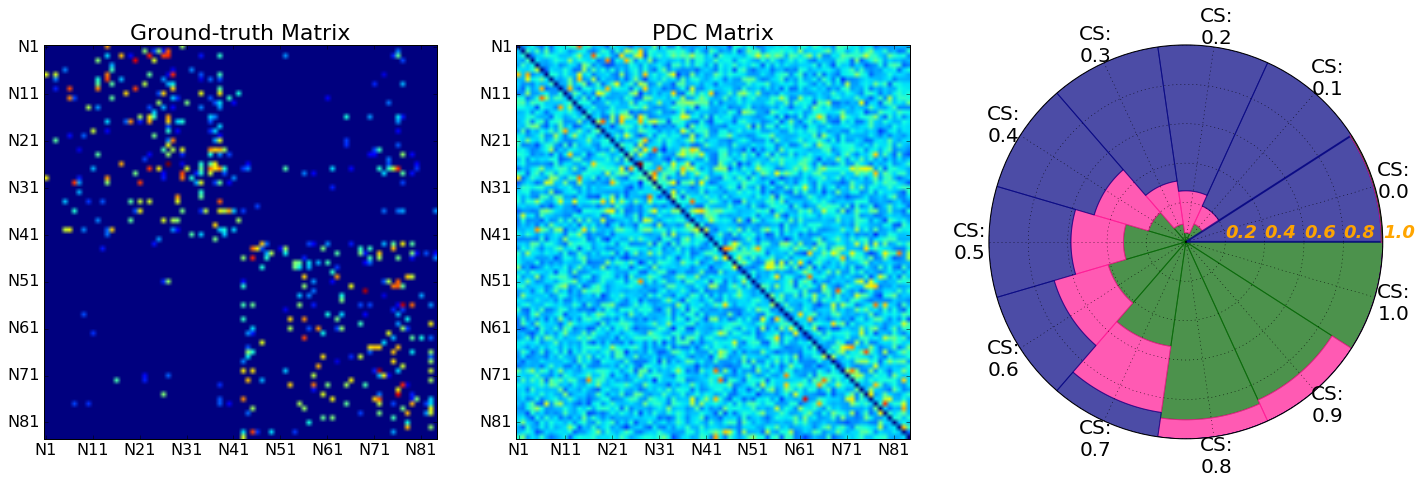

In [17]:
bm = 'PDC'
bmsavefilename=savedatadir+bm+datasets+'.mat'
if not os.path.isfile(bmsavefilename):
    mln_con_hidden_in1_matrix(basicdir,datasets,bmsavefilename,bm,N84gtMat)
BMmlnfMat = scipy.io.loadmat(bmsavefilename)
fNchanMat=BMmlnfMat['fNchanMat']
fig=figure(figsize=(24,8))
xindex=np.arange(0,nchan,10)
labelxN84=[labelnameN84[ix] for ix in xindex]

ax1=subplot(131)

cax=plt.imshow(N84gtMat)
ax1.set_xticks(xindex)
ax1.set_xticklabels(labelxN84,size=16)
ax1.set_yticks(xindex)
ax1.set_yticklabels(labelxN84,size=16)
ax1.set_title('Ground-truth'+' Matrix',size=22)

ax2=subplot(132)
fNchanMatc=fNchanMat.copy()
np.fill_diagonal(fNchanMatc,0)
plt.imshow(fNchanMatc)

ax2.set_xticks(xindex)
ax2.set_xticklabels(labelxN84,size=16)
ax2.set_yticks(xindex)
ax2.set_yticklabels(labelxN84,size=16)

ax3=subplot(133,polar=True)
tptnVectorR, tptnVector, pnVector=mi.mln_tptn(fNchanMat,N84gtMat,0.12,0.14)
ax2.set_title(bm+' Matrix',size=22)
md.mln_polar_bar_hf('try',tptnVectorR,ax=ax3)
plt.savefig(basicrawdir+datasets+bm+'matric_pie.eps',dpi=300)